# Exploratory Data Analysis on Haberman Dataset


## Importing the libaries and loading the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load haberman.csv into pandas dataframe
columns=['Age','Operational_age','Axil_nodes','Surv_status']
haberman=pd.read_csv('haberman.csv',names=columns)

# *Understand the data*

In [3]:
haberman.head()

,Age,Operational_age,Axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['Age', 'Operational_age', 'Axil_nodes', 'Surv_status'], dtype='object')


In [6]:
haberman.describe()

,Age,Operational_age,Axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### We can see that in survivalstatus it is given 1 for survived and 2 for not survived.It looks not good for EDA. So we will change **1** as **‘Yes’** and **2** as **'No'** by maping it. ###


In [7]:
haberman['Surv_status']=haberman['Surv_status'].map({1: "Yes", 2: "No"})

In [8]:
haberman.head()

,Age,Operational_age,Axil_nodes,Surv_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [9]:
haberman['Surv_status'].value_counts()

Yes    225
No      81
Name: Surv_status, dtype: int64

### **Observation**:


*   Total number of rows is 306 and columns is 4.
*   About 25% of people have no axilary nodes detected.
*   Mean age of people is 52
*   Out of 306 patients, 225 patients survived and 81 did not.







## *Univariate analysis*




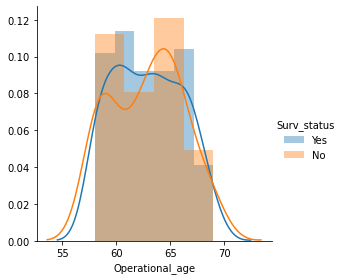

In [10]:
sns.FacetGrid(haberman,hue='Surv_status',size=4).map(sns.distplot,'Operational_age').add_legend()
plt.show()

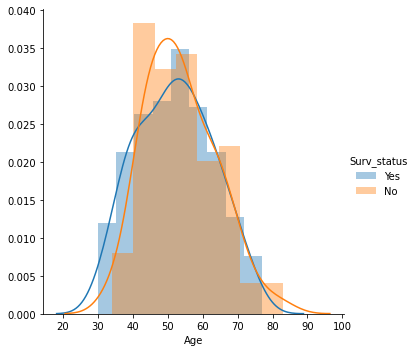

In [11]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
      .map(sns.distplot, "Age") \
      .add_legend();
plt.show()

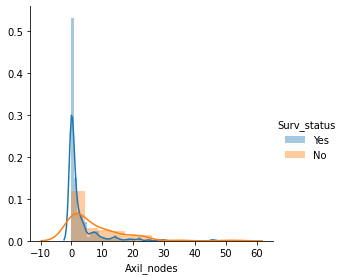

In [12]:
sns.FacetGrid(haberman,hue='Surv_status',size=4).map(sns.distplot,'Axil_nodes').add_legend()
plt.show()

### Observation :
* Distribution plots for ‘Age’ and ‘Operational_age’ are overlapping and    we cannot obtain any clear conclusion.
* From Distribution plot of ‘Axil_nodes’ we can see that among survived people number of auxillary nodes is dense from 0 to 5.



## *PDF & CDF plots for all features*






----------------------------:SURVIVED:------------------------------
bin_edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
pdf: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
----------------------------:NOT SURVIVED:--------------------------
bin_edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
pdf: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


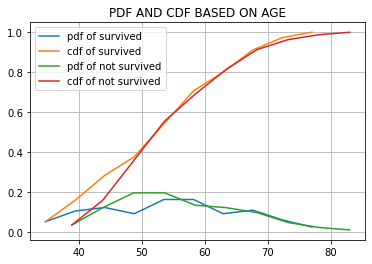

In [13]:
survived = haberman[haberman['Surv_status'] == 'Yes']
not_survived = haberman[haberman['Surv_status'] == 'No']
count,edges = np.histogram(survived['Age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.grid("white")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
print('----------------------------:SURVIVED:------------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))



plt.title('PDF AND CDF BASED ON AGE')
count,edges = np.histogram(not_survived['Age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('----------------------------:NOT SURVIVED:--------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))

## Observation :
*   Almost 95% patient who have survived have the age less than or equal to 70
*   Around 74% patient who died have an age of less than or equal to 60






----------------------------:SURVIVED:------------------------------
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
----------------------------:NOT SURVIVED:--------------------------
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


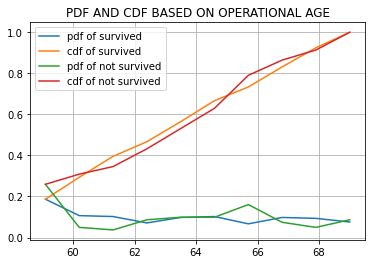

In [14]:
count,edges = np.histogram(survived['Operational_age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.grid("white")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
print('----------------------------:SURVIVED:------------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))



plt.title('PDF AND CDF BASED ON OPERATIONAL AGE')
count,edges = np.histogram(not_survived['Operational_age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('----------------------------:NOT SURVIVED:--------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))

## Observation :
* It is observed that 60% patience are undergoing surgery before the year 1964 and survived



----------------------------:SURVIVED:------------------------------
bin_edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
----------------------------:NOT SURVIVED:--------------------------
bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


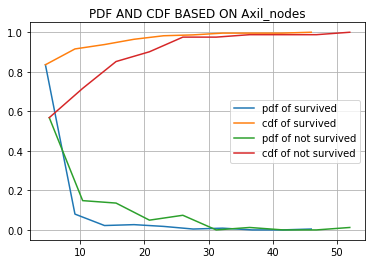

In [15]:
count,edges = np.histogram(survived['Axil_nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.grid("white")
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
print('----------------------------:SURVIVED:------------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))
plt.title('PDF AND CDF BASED ON Axil_nodes')
count,edges = np.histogram(not_survived['Axil_nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])
print('----------------------------:NOT SURVIVED:--------------------------')
print('bin_edges: {}'.format(edges))
print('pdf: {}'.format(pdf))

## Observation :
*  It is observed that 85% patience who survived have axil node less than 5
*  and also 58% people who not survived have axil node less than 5
*  Hence lower the axil nodes,greater chances of survival








## *Pair plot*

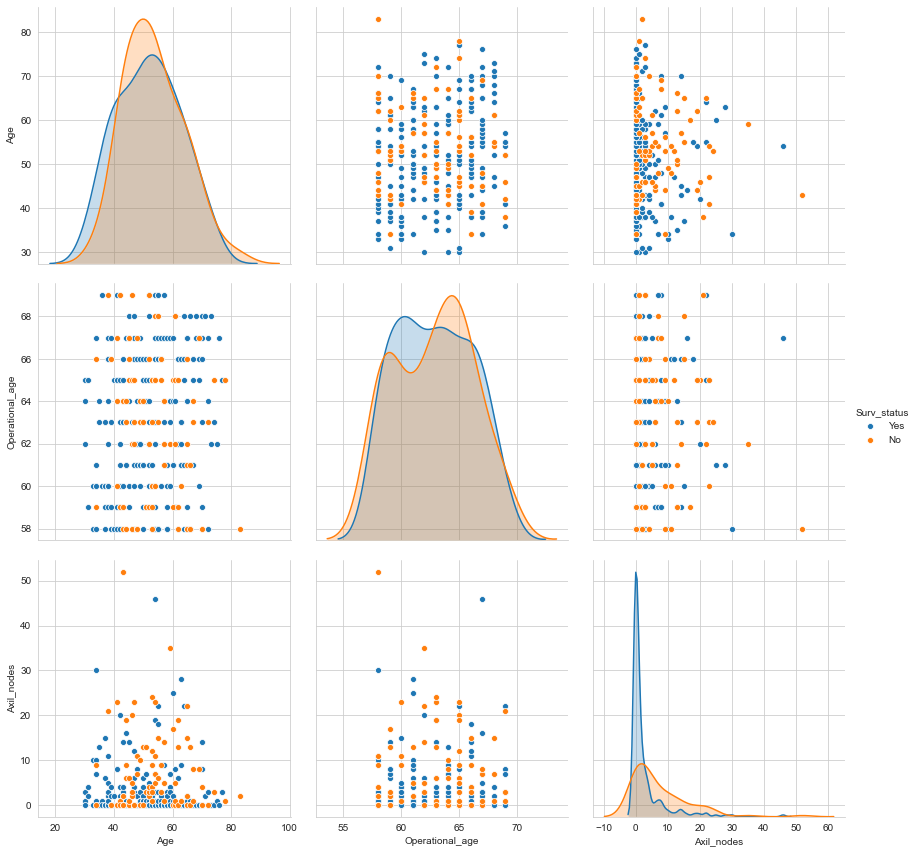

In [16]:
sns.set_style("whitegrid");
sns.pairplot(haberman,hue='Surv_status',size=4)

## *Contour Plot*


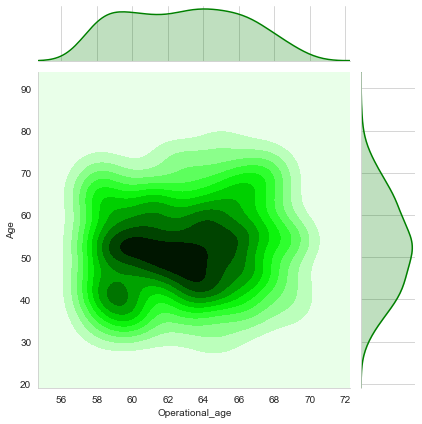

In [17]:
sns.jointplot(x='Operational_age',y='Age',data=haberman,color='g',kind='kde')
plt.show()

## Observation :
* From 1960 to 1964, more operations done on the patients in the age group 45 to 55.




## *Box Plot*

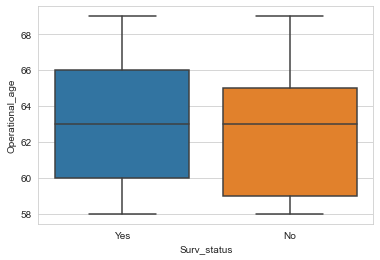

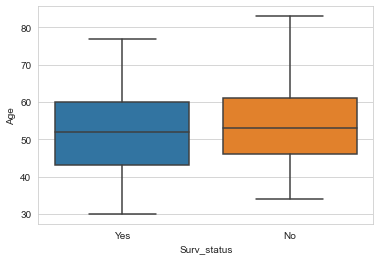

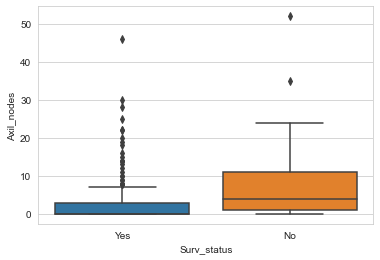

In [18]:
sns.boxplot(x='Surv_status',y="Operational_age",data=haberman)
plt.show()
sns.boxplot(x='Surv_status',y="Age",data=haberman)
plt.show() 
sns.boxplot(x='Surv_status',y="Axil_nodes",data=haberman)
plt.show()

## *Violin Plot*

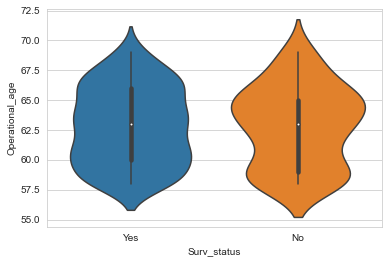

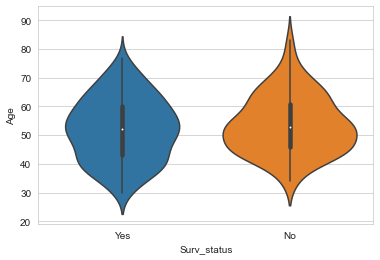

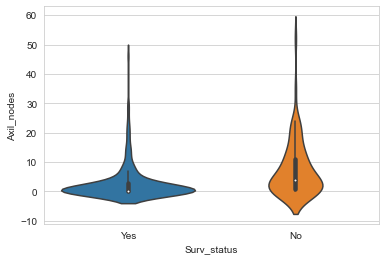

In [19]:
sns.violinplot(x='Surv_status',y="Operational_age",data=haberman)
plt.show()
sns.violinplot(x='Surv_status',y="Age",data=haberman)
plt.show()
sns.violinplot(x='Surv_status',y="Axil_nodes",data=haberman)
plt.show()

### Observation :
*   From Box_Plot we can see that 50% of patients have axil nodes less than or equal to 3
*   From Violin_Plots it is observed that the survived patients have axil nodes equal to zero and also who died had axil nodes greater than or equal to 1
*   As the axil node increases,the chances of survival decreases


